In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns


In [19]:
file_path = "/home/luca/LAB/LAB_federica/chembl1865/egfr_qsar/final_main.csv" 
df = pd.read_csv(file_path)

In [20]:
def prepare_data(df):
    numerical_data = df.select_dtypes(include=[np.number])
    
    numerical_data = numerical_data.dropna(axis=1, how='any')
    return numerical_data

data = prepare_data(df)

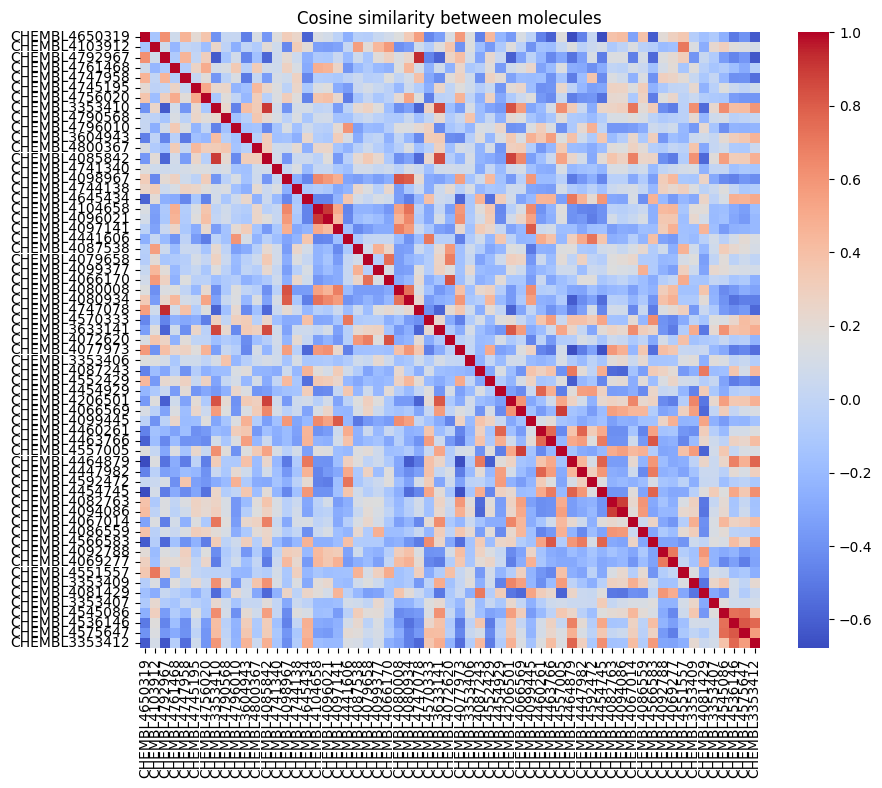

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
similarity_matrix = cosine_similarity(scaled_data)

def plot_similarity_heatmap(similarity_matrix, molecule_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=molecule_ids, yticklabels=molecule_ids)
    plt.title('Cosine similarity between molecules')

    plt.show()

plot_similarity_heatmap(similarity_matrix, df['Molecule ChEMBL ID'])

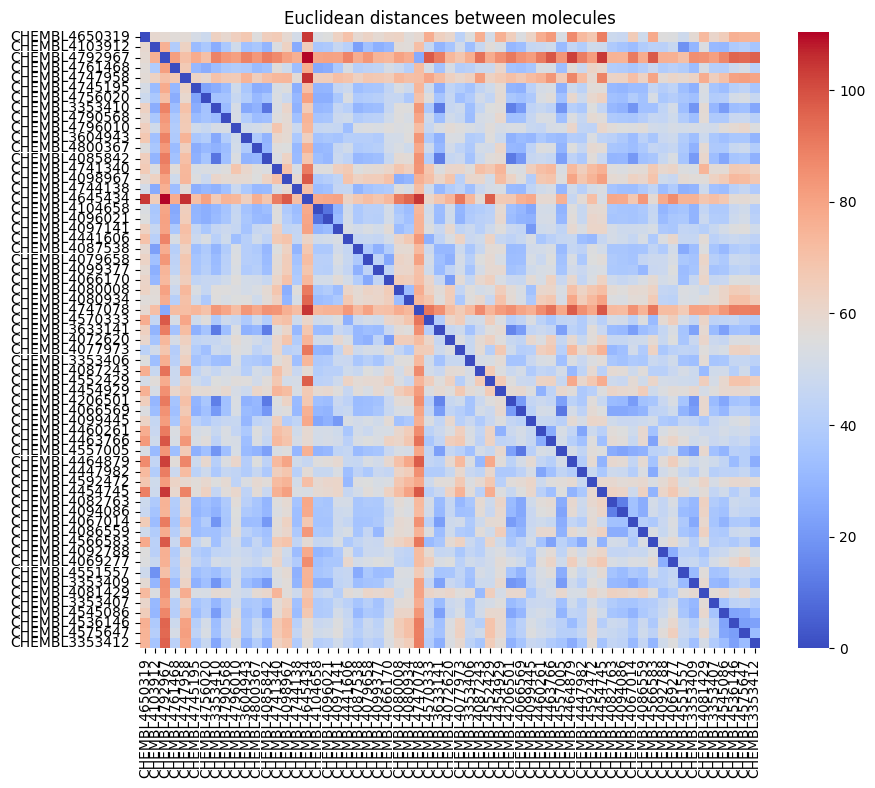

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
similarity_matrix = euclidean_distances(scaled_data)

def plot_similarity_heatmap(similarity_matrix, molecule_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=molecule_ids, yticklabels=molecule_ids)
    plt.title('Euclidean distances between molecules')
    plt.show()

plot_similarity_heatmap(similarity_matrix, df['Molecule ChEMBL ID'])

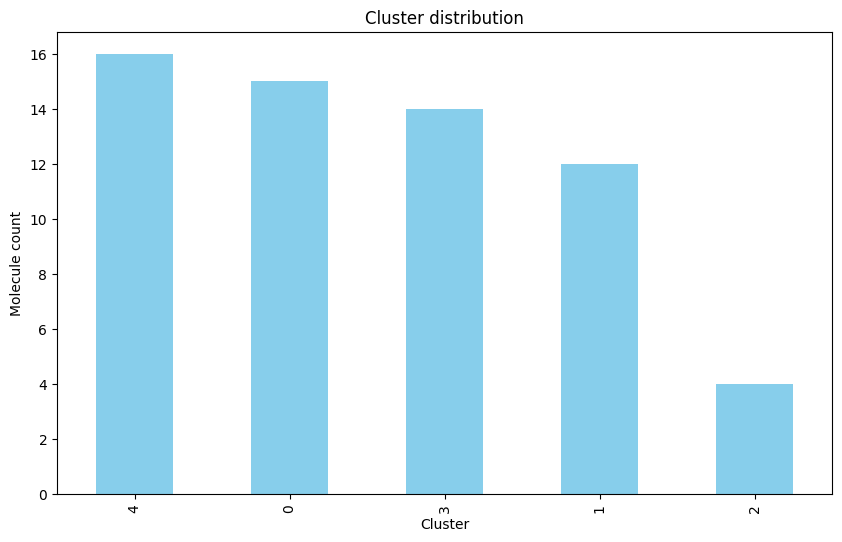

In [23]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(similarity_matrix)

plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cluster distribution')
plt.xlabel('Cluster')
plt.ylabel('Molecule count')
plt.show()

In [24]:
# Raggruppa le molecole per cluster e ottieni l'elenco
clusters = df.groupby('Cluster')['Molecule ChEMBL ID'].apply(list).to_dict()

# Stampa l'elenco delle molecole per ogni cluster
for cluster, molecules in clusters.items():
    print(f"Cluster {cluster}:")
    print(molecules)
    print("\n")


Cluster 0:
['CHEMBL4103912', 'CHEMBL3353410', 'CHEMBL3604943', 'CHEMBL4085842', 'CHEMBL4087538', 'CHEMBL4079658', 'CHEMBL4099377', 'CHEMBL4066170', 'CHEMBL3633141', 'CHEMBL4072620', 'CHEMBL4206501', 'CHEMBL4067014', 'CHEMBL3353407', 'CHEMBL4545086', 'CHEMBL3353412']


Cluster 1:
['CHEMBL4796010', 'CHEMBL4741340', 'CHEMBL4098967', 'CHEMBL4097141', 'CHEMBL4080008', 'CHEMBL4080934', 'CHEMBL4077973', 'CHEMBL4552429', 'CHEMBL4099445', 'CHEMBL4092788', 'CHEMBL4069277', 'CHEMBL4081429']


Cluster 2:
['CHEMBL4650319', 'CHEMBL4792967', 'CHEMBL4747958', 'CHEMBL4747078']


Cluster 3:
['CHEMBL4645434', 'CHEMBL4441606', 'CHEMBL4570333', 'CHEMBL4087243', 'CHEMBL4454929', 'CHEMBL4460261', 'CHEMBL4463766', 'CHEMBL4464879', 'CHEMBL4447982', 'CHEMBL4592472', 'CHEMBL4454745', 'CHEMBL4566583', 'CHEMBL4536146', 'CHEMBL4575647']


Cluster 4:
['CHEMBL4761468', 'CHEMBL4745195', 'CHEMBL4756020', 'CHEMBL4790568', 'CHEMBL4800367', 'CHEMBL4744138', 'CHEMBL4104658', 'CHEMBL4096021', 'CHEMBL3353406', 'CHEMBL4066569

In [25]:
pca = PCA(n_components=10, svd_solver='auto', random_state=42)
pca_results = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

tsne = TSNE(n_components=2,
                        perplexity=30, learning_rate=200,
                        max_iter=1000,
                        random_state=42)
tsne_results = tsne.fit_transform(pca_results)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    scatter_pca = axes[0].scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7, 
                                  c=[cluster_colors[label] for label in cluster_labels], s=50)

    axes[0].set_title(f'PCA: Variance\nPC1={total_explained_variance[0]:.2%}, PC2={total_explained_variance[1]:.2%}')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    scatter_tsne = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    axes[1].set_title('t-SNE: 2D projection')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    axes[0].legend(handles, labels, title="Clusters", loc='upper left')
    #axes[1].legend(handles, labels, title="Clusters", loc='upper left')

    plt.tight_layout()
    plt.show()


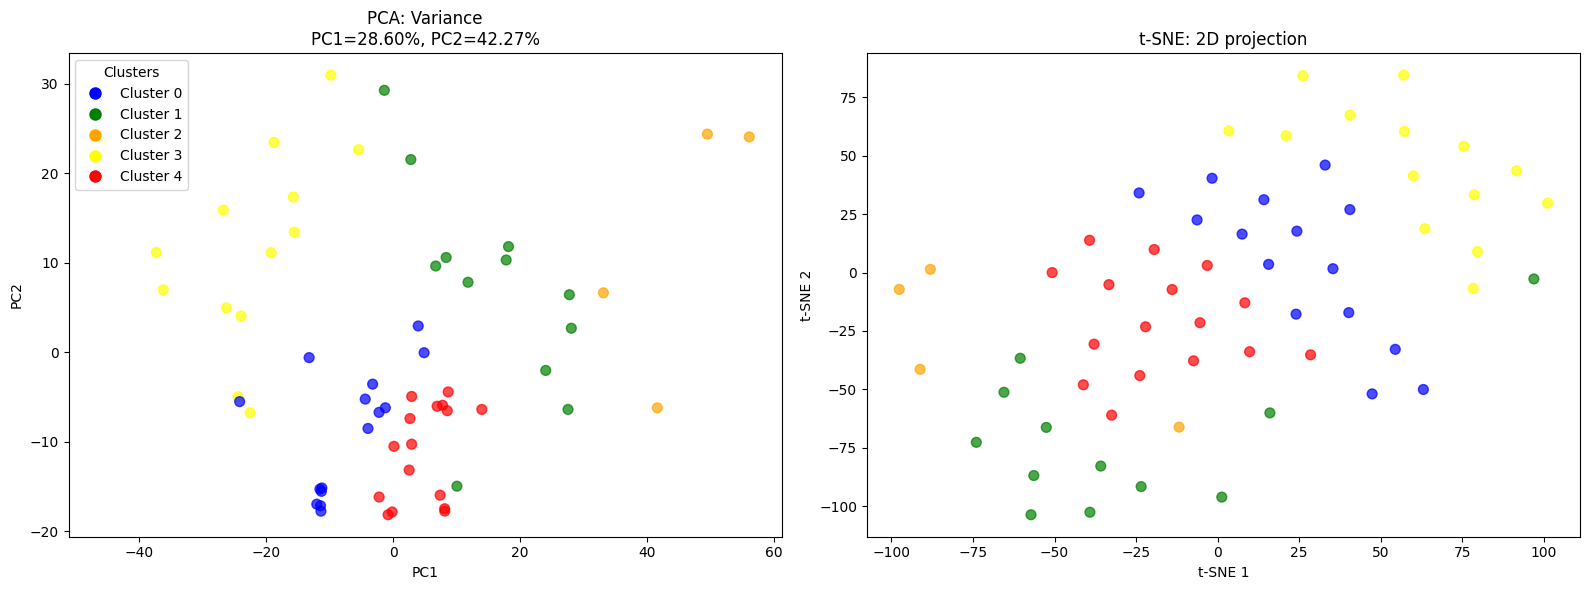

total_explained_variance: [0.28595156 0.42268491 0.55169005 0.61444102 0.6608915  0.69530699
 0.72520875 0.75118209 0.77478985 0.79720748]


In [26]:
plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])
print(f'total_explained_variance: {total_explained_variance}')

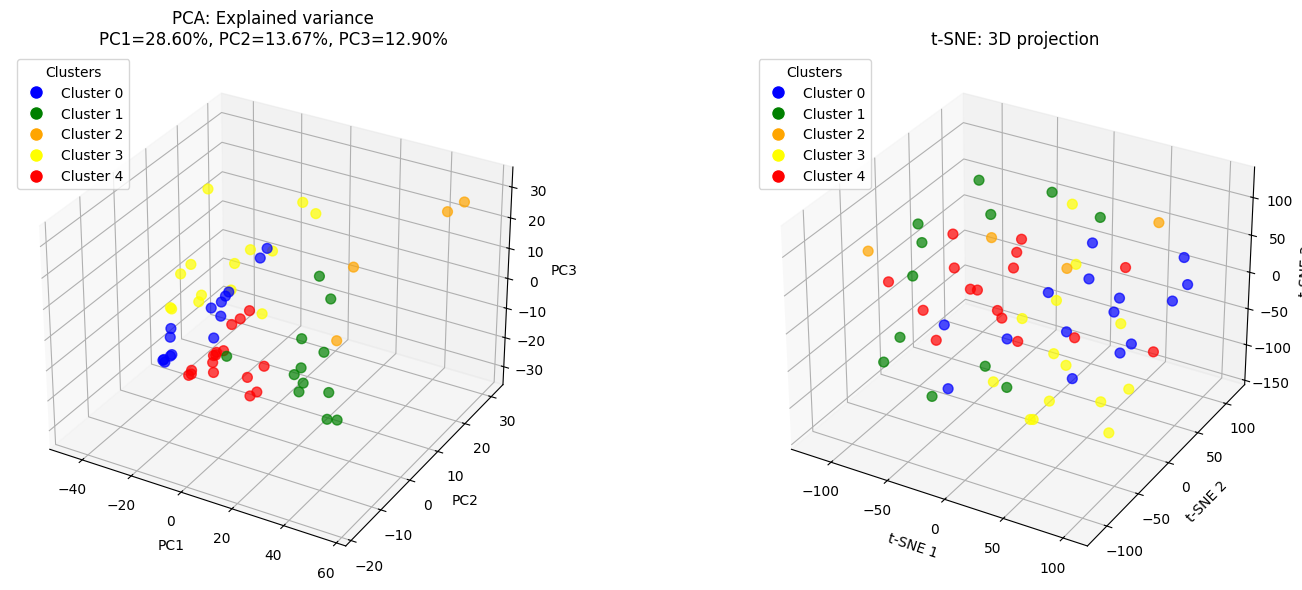

total_explained_variance: [0.28595156 0.42268491 0.55169005 0.61444102 0.6608915  0.695307
 0.7252088  0.75118225 0.77479013 0.79720926 0.81577768 0.8330845
 0.84828237 0.8625409  0.87572396]


In [27]:
# PCA
pca = PCA(n_components=7)
pca_results = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(pca_results)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig = plt.figure(figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    ax_pca = fig.add_subplot(121, projection='3d')
    scatter_pca = ax_pca.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], alpha=0.7, 
                                 c=[cluster_colors[label] for label in cluster_labels], s=50)
    ax_pca.set_title(f'PCA: Explained variance\nPC1={explained_variance[0]:.2%}, PC2={explained_variance[1]:.2%}, PC3={explained_variance[2]:.2%}')
    ax_pca.set_xlabel('PC1')
    ax_pca.set_ylabel('PC2')
    ax_pca.set_zlabel('PC3')

    ax_tsne = fig.add_subplot(122, projection='3d')
    scatter_tsne = ax_tsne.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    ax_tsne.set_title('t-SNE: 3D projection')
    ax_tsne.set_xlabel('t-SNE 1')
    ax_tsne.set_ylabel('t-SNE 2')
    ax_tsne.set_zlabel('t-SNE 3')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    ax_pca.legend(handles, labels, title="Clusters", loc='upper left')
    ax_tsne.legend(handles, labels, title="Clusters", loc='upper left')

    plt.tight_layout()
    plt.show()

plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])
print(f"total_explained_variance: {total_explained_variance}")

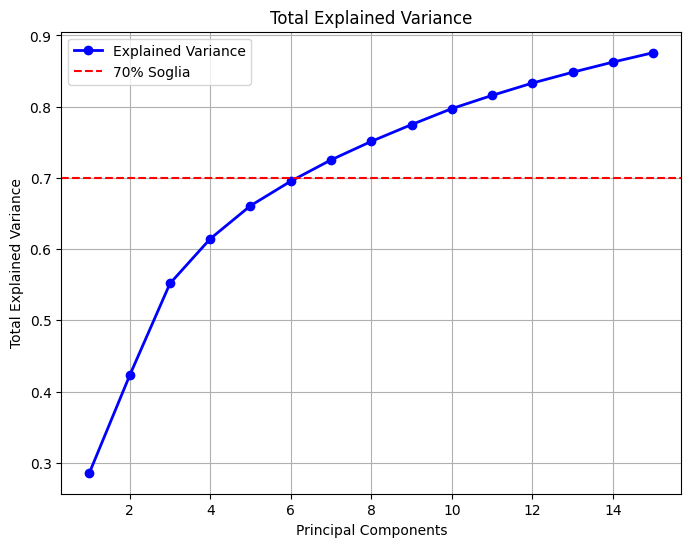

In [28]:
plt.figure(figsize=(8, 6))
components = np.arange(1,len(total_explained_variance)+1)
plt.plot(components, total_explained_variance, marker='o', color='b',linestyle='-', linewidth=2, label='Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Total Explained Variance')
plt.title('Total Explained Variance')
plt.axhline(0.70, color='r', linestyle='--', label='70% Soglia')
plt.grid(True)
plt.legend()
plt.show()


Numero ottimale di componenti per 70.0% di varianza: 7


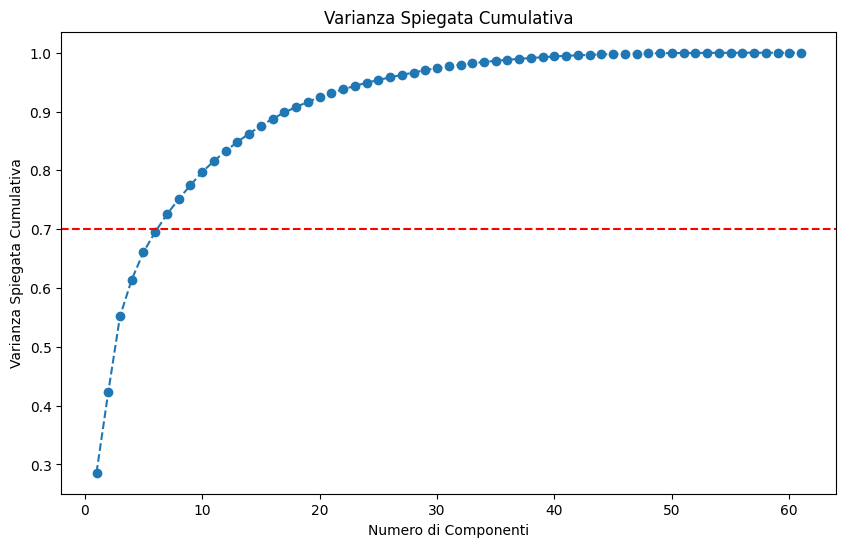

7

In [33]:
def find_optimal_pca_components(data, explained_variance_threshold=0.95):
    from sklearn.decomposition import PCA
    pca = PCA()
    pca_results = pca.fit_transform(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    optimal_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    print(f"Numero ottimale di componenti per {explained_variance_threshold*100}% di varianza: {optimal_components}")
    
    # Visualizza la varianza spiegata cumulativa
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.axhline(y=explained_variance_threshold, color='r', linestyle='--')
    plt.title('Varianza Spiegata Cumulativa')
    plt.xlabel('Numero di Componenti')
    plt.ylabel('Varianza Spiegata Cumulativa')
    plt.show()

    return optimal_components
find_optimal_pca_components(scaled_data, 0.70)

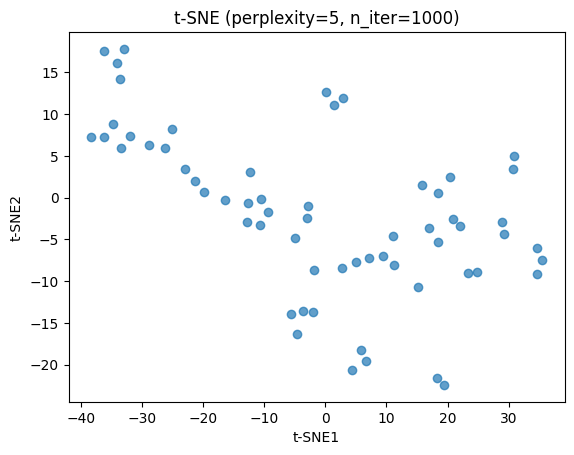

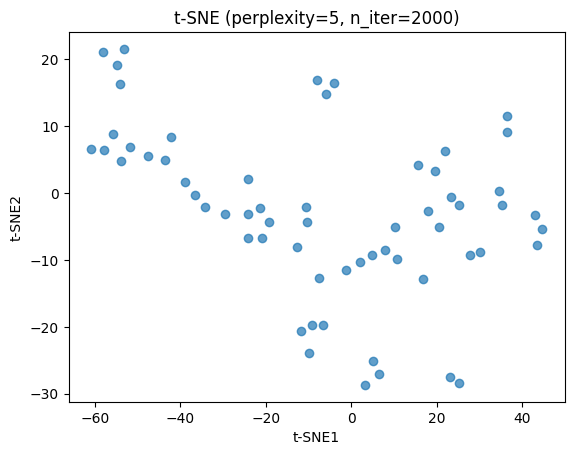

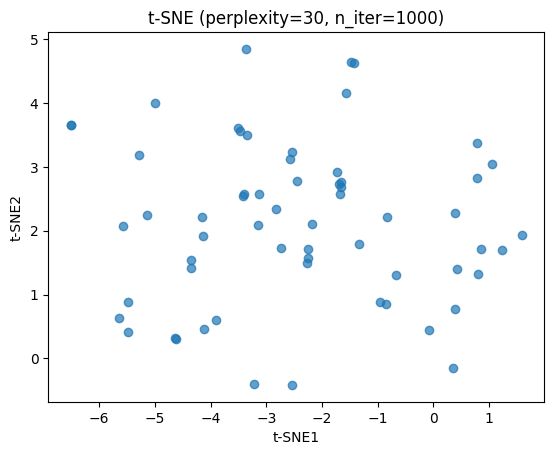

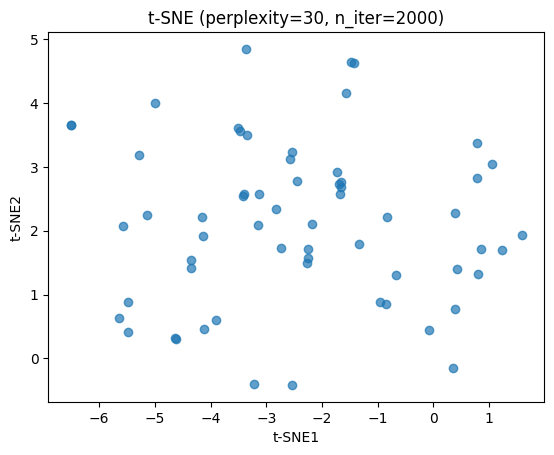

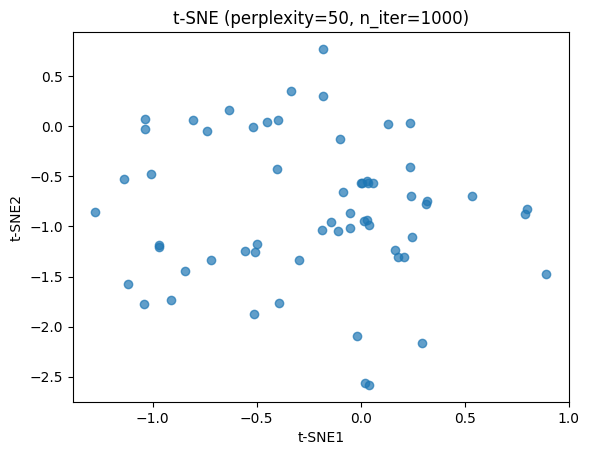

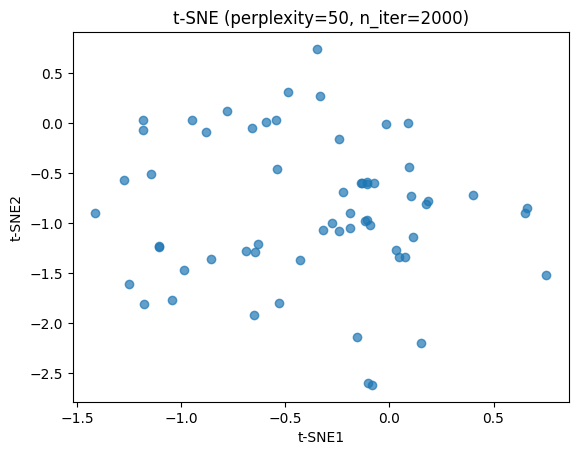

In [34]:
# Analisi per trovare i migliori parametri di t-SNE
def analyze_tsne_params(data, perplexities=[5, 30, 50], n_iters=[1000, 2000]):
    from sklearn.manifold import TSNE
    for perplexity in perplexities:
        for n_iter in n_iters:
            tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=42)
            tsne_data = tsne.fit_transform(data)
            plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7)
            plt.title(f't-SNE (perplexity={perplexity}, n_iter={n_iter})')
            plt.xlabel('t-SNE1')
            plt.ylabel('t-SNE2')
            plt.show()

# Utilizzo:
analyze_tsne_params(pca_results)


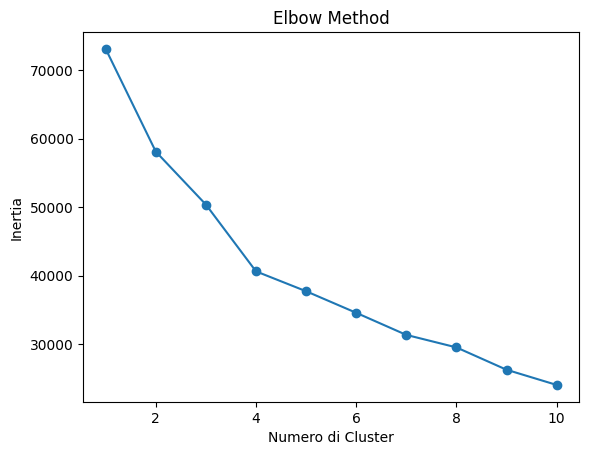

In [35]:
# Elbow Method per determinare il numero di cluster
def elbow_method(data, max_clusters=10):
    from sklearn.cluster import KMeans
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Numero di Cluster')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Utilizzo:
elbow_method(pca_results)


Numero di cluster: 2, Silhouette Score: 0.2314305196913092
Numero di cluster: 3, Silhouette Score: 0.22823091208072321
Numero di cluster: 4, Silhouette Score: 0.23938239520315427
Numero di cluster: 5, Silhouette Score: 0.22582671750841554
Numero di cluster: 6, Silhouette Score: 0.19456706127624362
Numero di cluster: 7, Silhouette Score: 0.18539410353298427
Numero di cluster: 8, Silhouette Score: 0.18982645942572224
Numero di cluster: 9, Silhouette Score: 0.18969728940521952
Numero di cluster: 10, Silhouette Score: 0.19253771633646333


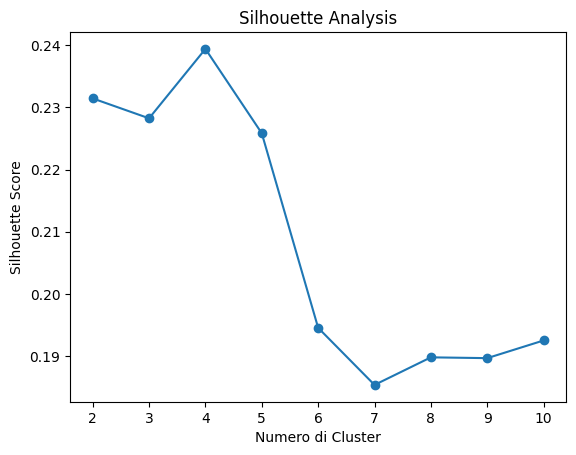

In [36]:
# Silhouette Analysis
def silhouette_analysis(data, max_clusters=10):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        labels = kmeans.labels_
        score = silhouette_score(data, labels)
        scores.append(score)
        print(f'Numero di cluster: {k}, Silhouette Score: {score}')

    plt.plot(range(2, max_clusters + 1), scores, marker='o')
    plt.xlabel('Numero di Cluster')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()

# Utilizzo:
silhouette_analysis(pca_results)


In [39]:
df=pd.read_csv("/home/luca/LAB/LAB_federica/chembl1865/egfr_qsar/final_df.csv")
f=df["rdkit_Ipc"].values   
print(f"{f}")

[6.37012413e+15 5.19612144e+13 1.51770485e+15 3.38022305e+14
 1.17035001e+15 3.10792539e+14 5.07573690e+14 5.19612144e+13
 1.45620691e+14 1.15118026e+14 3.45001980e+13 3.22412994e+14
 5.11228273e+13 5.19612144e+13 2.38136190e+15 1.27236030e+14
 6.31339578e+11 3.38212579e+14 3.32771923e+14 2.09368181e+14
 1.77102470e+13 5.19612144e+13 8.14495399e+13 5.11228273e+13
 8.14495399e+13 6.75376003e+14 2.25384614e+15 1.00921276e+15
 1.13235023e+13 5.09139113e+13 8.14495399e+13 1.57652806e+15
 8.66848837e+13 2.68601142e+13 1.56605632e+15 1.67314226e+13
 5.18412400e+13 1.60523462e+14 2.24541780e+14 1.20998003e+13
 7.41409238e+12 1.59752088e+14 4.12534319e+12 1.84194887e+13
 2.40397065e+13 2.31158165e+12 2.42292952e+14 2.45149270e+14
 5.19612144e+13 2.40376813e+14 1.11045884e+13 2.52699616e+14
 8.50585104e+14 1.59752088e+14 1.55425020e+14 5.75875818e+13
 5.19612144e+13 3.37537183e+13 1.19660891e+13 1.15038554e+13]
